In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

BASE_PATH = "/content/drive/MyDrive/DataScience/ObjDectection_Caltech_Airplanes/dataset/"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "images"])
ANNOTS_PATH = os.path.sep.join([BASE_PATH, "airplanes.csv"])
BASE_OUTPUT = "/content/drive/MyDrive/DataScience/ObjDectection_Caltech_Airplanes/output/"
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_FILENAMES = os.path.sep.join([BASE_OUTPUT, "test_images.txt"])
INIT_LR = 1e-4
NUM_EPOCHS = 25
BATCH_SIZE = 32

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

In [7]:
predict_image = "/content/drive/MyDrive/DataScience/ObjDectection_Caltech_Airplanes/output/test_images_new.txt"
filetype = mimetypes.guess_type(predict_image)[0]
imagePaths = [predict_image]

if 'text/plain' == filetype:
  filenames = open(predict_image).read().strip().split("\n")
  imagePaths = []

  for f in filenames:
    p = os.path.sep.join([IMAGES_PATH, f])
    imagePaths.append(p)

loading object detector


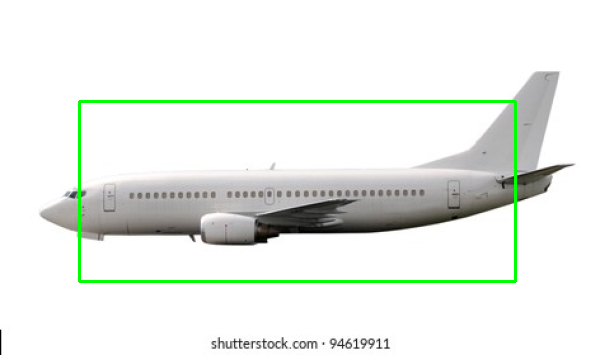

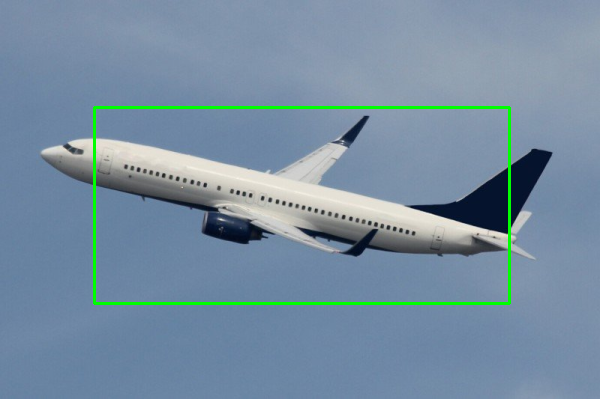

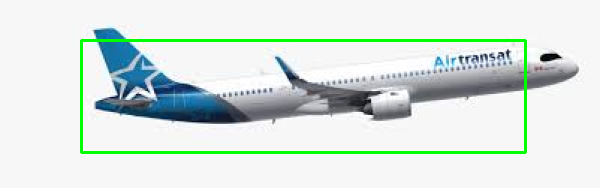

In [8]:
from google.colab.patches import cv2_imshow
print("loading object detector")

model = load_model(MODEL_PATH)

for imagepath in imagePaths:
  image = load_img(imagepath, target_size=(224,224))
  image = img_to_array(image) / 255.0
  image = np.expand_dims(image, axis = 0)

  preds = model.predict(image)[0]
  (startX, startY, endX, endY) = preds

  image = cv2.imread(imagepath)
  image = imutils.resize(image, width=600)
  (h, w) = image.shape[:2]

  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)

  cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

  cv2_imshow(image)